<a href="https://www.kaggle.com/hozaifazaki99/what-causes-heart-disease-let-s-make-analysis?scriptVersionId=88577445" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data preprocessing

### Importing Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

### Loading data and take a quick look

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
data.shape

(303, 14)

In [4]:
# take a look to the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


    Features Explanation:

    1- age: The person's age in years
    2- sex: The person's sex (1 = male, 0 = female)
    3- cp: The chest pain experienced (Value 1: typical angina, 
    Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    4- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
    5- chol: The person's cholesterol measurement in mg/dl
    6- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
    7- restecg: Resting electrocardiographic measurement
    (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or
    definite left ventricular hypertrophy by Estes' criteria)
    8- thalach: The person's maximum heart rate achieved
    9- exang: Exercise induced angina (1 = yes; 0 = no)
    10- oldpeak: ST depression induced by exercise relative to rest 
    ('ST' relates to positions on the ECG plot. See more here)
    11- slope: the slope of the peak exercise ST segment 
    (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    12- ca: The number of major vessels (0-3)
    13- thal: A blood disorder called thalassemia
    (3 = normal; 6 = fixed defect; 7 = reversable defect)
    14- target: Heart disease (0 = no, 1 = yes)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


    NOTICE:
    - We can observe that the data doesn't have any missing values
    - All features are numeric




In [6]:
# Let's show some statics
data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


    summary:
    1- from the first look, all columns have a good distribution
    since the average value is closer to the half quartile range of the data,  
    2- the column "chol", "thalach", "trestbps" may have some outliers or need to be standardized

    3- Therefore the skewness of the data is very small with a small number of standard deviation
    which makes all of them close to normal distribution

In [7]:
''' Incosistency in data types check'''
data.applymap(type).apply(pd.value_counts).fillna(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<class 'int'>,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,0.0,303.0,303.0,303.0,303.0
<class 'float'>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,0.0,0.0,0.0,0.0


    there are no any mixing data types in columns

# Outliers

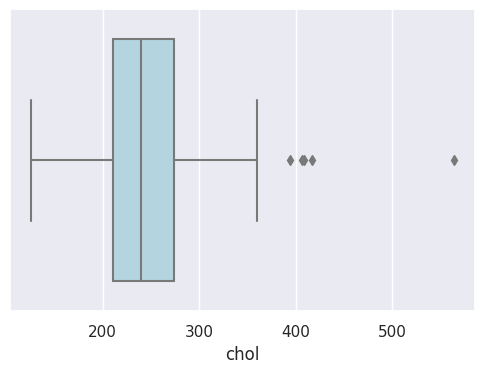

In [8]:
''' Let's take a look at the column we suspect '''
plt.figure(dpi = 100)
sns.boxplot(x = data['chol'], color = 'lightblue')
plt.show()

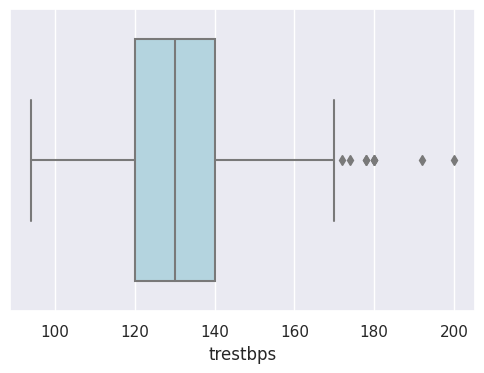

In [9]:
plt.figure(dpi = 100)
sns.boxplot(x = data['trestbps'], color = 'lightblue')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


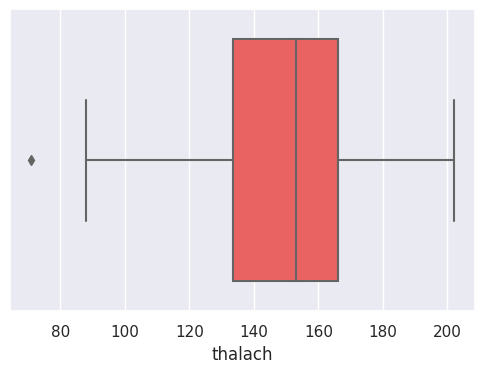

In [10]:
# Boxplot
plt.figure(dpi = 100)
sns.boxplot(data['thalach'], color = '#ff4d4d')
plt.show()

    NOTICE:
    it looks like it has some outliers, but we talking about medical situations that do exist in reality,
    so they can be real situations and we need our model to take it in consideration

# Data Analysis

### 1- Correlation

<AxesSubplot:>

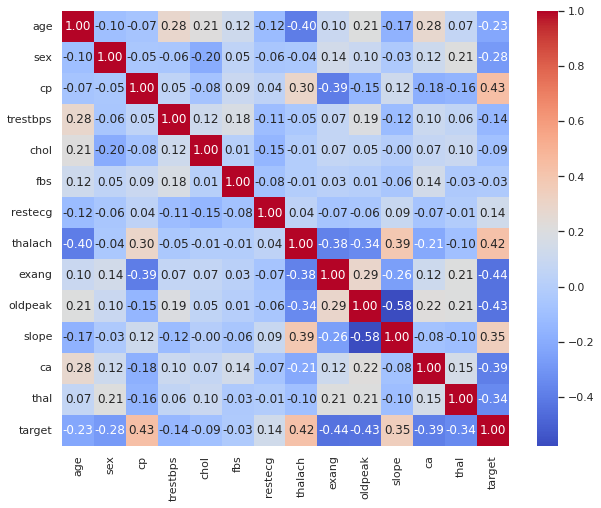

In [11]:
#Generate Heat Map, allow annotations and place floats in map
ax = plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f")

    The most features which the heart disease depend on :
    - as we can see
     "cp" which is the 'the chest pain ' and 
     "thalach" which is the 'maximum heart rate' and 
     "slope" which is 'the slope of the peak exercise ST segment'
      have the most (positive) influence on heart disease state

    - also 
    "exang" which is the 'Exercise induced angina' and 
    "oldpeak" which is the 'depression induced by exercise relative to rest' and 
    "ca" which is the 'The number of major vessels' have a (negative) influence on the heart disease state

    summary:
    age influence on heart disease:
    - 'age' have a negative relation with 'thalach' (max heart rate)
    - 'age' have a positive relation with 'trestbps' (blood pressure at rest)
    - 'age' have a positive relation with 'ca' (number of major vessels)
    
    cp influence on hear disease:
    - 'cp' (chest pain) has a positive relation with 'thalach' (max heart rate)
    - 'cp' has a negative relation with 'exang' ( Exercise induced angina )

    a big dependency between 'slope and 'oldpeak' negative relation

### convert some columns from numeric to their actual meaning "strings" to be readable



In [12]:
dataa = data.copy() # make a copy to work on

# target col
bins = [-0.5,0.5,1.5]
labels = ['healthy', 'heart disease']
dataa.target = pd.cut(data.target, bins = bins, labels = labels)

In [13]:
dataa.target.value_counts()

heart disease    165
healthy          138
Name: target, dtype: int64

In [14]:
# chest pain "cp" col
bins = [-0.5,0.5,1.5, 2.5, 3.5]
labels = ['typical angina', 'atypical angina','non-anginal pain', 'asymptomatic']
dataa.cp = pd.cut(data.cp, bins = bins, labels = labels)

In [15]:
dataa.cp.value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64

In [16]:
# slope col
bins = [-0.5,0.5,1.5, 2.5]
labels = ['up-sloping', 'flat', 'down-sloping']
dataa.slope = pd.cut(dataa.slope, bins = bins, labels = labels)

In [17]:
dataa.slope.value_counts()

down-sloping    142
flat            140
up-sloping       21
Name: slope, dtype: int64

In [18]:
# angina "exang" col
bins = [-0.5,0.5,1.5]
labels = ['don\'t have angina','have angina']
dataa.exang = pd.cut(dataa.exang, bins = bins, labels = labels)

In [19]:
dataa.exang.value_counts()

don't have angina    204
have angina           99
Name: exang, dtype: int64

## 2- Let's discuss these relations

In [20]:
# using plotly to make an interactive charts
import plotly.figure_factory as ff
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [21]:
''' Some helpful functions '''
def violin_data(df, col):
    d0 = df[col][df['target']=='healthy']
    d1 = df[col][df['target']=='heart disease']
   
    trace0 = go.Violin(y=d0, name='healthy', box_visible = True)
    trace1 = go.Violin(y=d1, name='heart disease', box_visible = True)

    data=[trace1,trace0]
    return data



def boxplot_data(df,col):
    d0 = df[col][df['target']=='healthy']
    d1 = df[col][df['target']=='heart disease']
   
    trace0 = go.Box(y=d0, name='healthy')
    trace1 = go.Box(y=d1, name='heart disease')

    data=[trace0,trace1]
    return data


In [22]:
fig = px.histogram(dataa, x= 'target', color = 'target')
fig.update_layout(title="counting cases", xaxis_title="target",\
                  yaxis_title="no. of cases",legend_title="target", font=dict(size=12))
fig.show()

In [23]:
fig = px.histogram(dataa, x="cp", color='target', barmode='group', height=400)
fig.update_layout(title="Effect of chest pain on heart disease", xaxis_title="chest pain",\
                  yaxis_title="no. of cases",legend_title="target", font=dict(size=12))
fig.show()

    Observation:
    - we can notice that most cases that have 'heart disease' suffer from a 'non-anginal pain' 
    69 cases out of 87 have heart disease
    - with the 'typical angina' most of the cases don't suffer from heart disease,
    104 cases out of 143 are healthy

In [24]:
fig=go.Figure(data=violin_data(dataa,'cp'))
fig.update_layout(title="Effect of chest pain on heart disease", xaxis_title="target", yaxis_title="chest pain",\
                  legend_title="Target", font=dict(size=12))
fig.show()

    - it's clearly here most cases distributed around the 'non-anginal pain' with respect to heart disease
    while in healthy cases most of the cases distributed around the 'typical angina'

In [25]:
fig = go.Figure(data = violin_data(dataa, 'thalach'))
fig.update_layout(title = "Effect of heart rate  on heart disease", xaxis_title="target", yaxis_title="max heart rate",\
                  legend_title="target", font=dict(size=12))

    - we can notice that with higher levels in 'heart rate' the cases who are suffering from heart disease are increased
    - 'heart rate' > 160  causes a 'heart disease'
    - healthy people have a 'heart rate' < 140 
    - data distributed closer to the mean 


### Slope featrue:

    we gonna discuss the slope feature so we need to know what does that mean
    the slope of the peak exercise ST segment, where
    ST segment is the flat, isoelectric section of the ECG between the end of the S wave (j point)  and the beginning of the T wave.

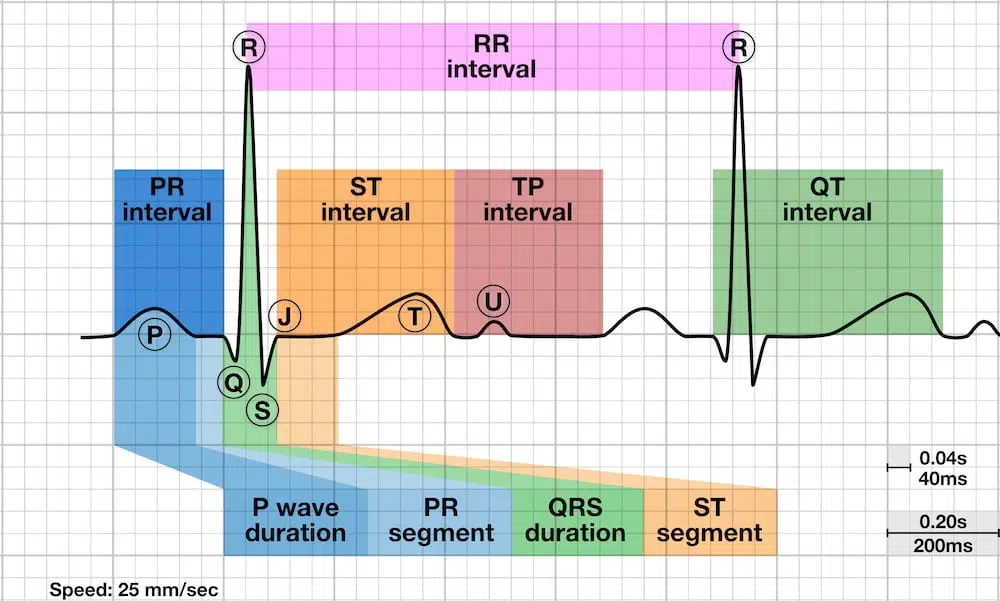

    The most important cause of ST segment abnormality is depression
    

In [26]:
fig = px.histogram(dataa, x = 'slope', color = 'target', barmode='group')
fig.update_layout(title = "Effect of ST-segment slope on heart disease", xaxis_title="slope of ST segment", yaxis_title="no. of cases",\
                  legend_title="target", font=dict(size=12))
fig.show()

    Observation:
    - most the healthy people have a flat ST segment slope,
    107 out of 142 have heart disease
    - most of the people that have heart disease have a downsloping in the ST segment,
    91 out of 140 are healthy people
    - for up sloping, it's closer to each other

In [27]:
fig = go.Figure(data = violin_data(dataa, 'slope'))
fig.update_layout(title = "Effect of ST-segment slope on heart disease", xaxis_title="target", yaxis_title="slope of ST segment",\
                  legend_title="target", font=dict(size=12))
fig.show()

    Observation:
    - as we can see here most of the healthy people are distributed around the flat slope of the ST segment,
     we observe that previously in the Histogram chart
    

### incuded angina feature

In [28]:
fig = px.histogram(dataa, x = 'exang', color = 'target', barmode='group')
fig.update_layout(title = "Effect of angina on heart disease", xaxis_title="angina", yaxis_title="no. of cases",\
                  legend_title="target", font=dict(size=12))
fig.show()

    Observation:
    - most the healthy people have a flat ST segment slope,
    107 out of 142 have heart disease
    - most of the people that have heart disease have a downsloping in the ST segment,
    91 out of 140 are healthy people
    - for up sloping, it's closer to each other

In [29]:
fig = go.Figure(data = violin_data(dataa, 'exang'))
fig.update_layout(title = "Effect of angina on heart disease", xaxis_title="target", yaxis_title="angina",\
                  legend_title="target", font=dict(size=12))
fig.show()

    Observation:
    - as we can see here angina doesn't make heart disease in most cases,
    most people who don't have angina are suffering from heart disease

    so far we discussed most of the reasons that may cause heart disease, 
    we got enough here let's go to the model that we will produce

# Training phase

In [30]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


    we need to standardize the data, because we have different ranges

### 1- Train test split

In [31]:
X = data.drop('target', axis = 1).values
y = data['target'].values

In [32]:
X.shape, y.shape

((303, 13), (303,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [34]:
X_train.shape, X_val.shape

((242, 13), (61, 13))

### 2- Standardize data

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

### 3- Check skewness in classes

In [36]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

    we have some skewness here, we need a penalty on weights when creating the model

### 4- Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# train accuracy
acc = np.mean(y_train == model.predict(X_train))*100
print(f'accuracy of training -> {acc}')
# val
acc = np.mean(y_val == model.predict(X_val))*100
print(f'accuracy of validation -> {acc}')

accuracy of training -> 84.29752066115702
accuracy of validation -> 80.32786885245902


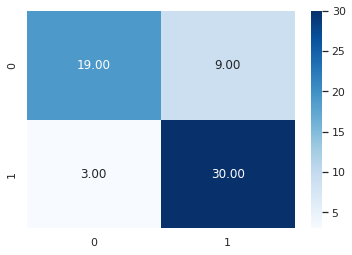

In [39]:
import sklearn.metrics as mt
sns.heatmap(mt.confusion_matrix(y_val, model.predict(X_val)), annot=True, 
            fmt='.2f', cmap = 'Blues')
plt.show()

In [40]:
print(mt.classification_report(y_val, model.predict(X_val), target_names=['healthy', 'heart disease']))

               precision    recall  f1-score   support

      healthy       0.86      0.68      0.76        28
heart disease       0.77      0.91      0.83        33

     accuracy                           0.80        61
    macro avg       0.82      0.79      0.80        61
 weighted avg       0.81      0.80      0.80        61



# Conclusion

    we discussed a various reasons that causes heart disease you can find more and more reasons across these features
    also, we trained a Logistic regression model and we got good results since we have a small dataset 
    you can also try another model it can give you better results